# Math 189 - Final Report

## Names
* Nyan Aye
* Serena Xie
* Angela Shen
* Bofu Zou
* Kyounghyun Sou

#### Research Question
Do household housing cost burdens in California predict educational attainment in Californian adults? 

#### Background
Housing costs have always been a rising concern in California, especially in densely populated major cities such as Los Angeles and San Francisco. In fact, as the population grows and the housing supply is unable to keep up, California has become the third most expensive state to live in as of 2024.  As housing costs grow, households become more unlikely to spend on other matters, such as education, which will be the main focus of our study. The goal of our study is to find out if we can draw a correlation between the percentage monthly household income paid towards housing costs versus the percentage of adults in an area pursuing a 4-year college degree or higher. In broader strokes, we hope that finding said correlation would display the importance of housing issues by showing such issues can alleviate other issues, starting with education, in California. 

#### Hypothesis
There exists a correlation between the percentage of households with ‘high’ household burden (30% of household income goes towards housing) and the percentage of individuals in the area pursuing a 4-year college degree or higher within the same area.

#### Data
We found two datasets for this project from the data provided by the California government. The first one is about [California housing cost burdens](https://data.ca.gov/dataset/housing-cost-burden), with a focus on the variables percentage of income burden in household, county and region. The second dataset should be the [educational attainment dataset](https://data.ca.gov/dataset/educational-attainment), with variables county, region, and estimated percentage of educational attainment in region. Each dataset should have at least 1000 observations to be able to draw accurate estimations, with the housing cost burdens dataset utilizing a sample size of 521,264 and education attainment dataset utilizing a sample size of 166,662. We want to draw a present correlation between housing cost and education from previous historical trends, so both datasets will have a temporal coverage of 2006-2010. 

### Data Cleaning
To make our data useable, we cleaned the data based on our needs. For the educational attainment dataset, we removed the first few rows that aggregate education level by race, since this is not relevant to our goals. For the housing burden dataset, we only kept observations classified under “50% of monthly income…” and “all income levels/monthly income at all levels…income”. We also removed some columns from the table and only kept relevant data such as estimates since the dataset is too large. Afterwards, each person responsible for EDA and testing will further modify the clean data to their own needs, usually to find the mean estimates of each county for the datasets, leaving us with 58 observations.

In [1]:
import pandas as pd
import numpy as np
import re

def unicode_to_symbols(encoded_string):
    pattern = re.compile(r'_x([0-9A-Fa-f]{4})_')
    def replace_with_char(match):
        # Convert the hexadecimal value to an integer, then to the corresponding Unicode character
        return chr(int(match.group(1), 16))
    # Replace all occurrences of encoded Unicode with their corresponding characters
    return pattern.sub(replace_with_char, encoded_string)

housing_df = pd.read_excel('housing.xlsx')
education_df = pd.read_excel('education.xlsx')

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
housing_df.head()

,ind_id,ind_definition,datasource,reportyear,burden,tenure,race_eth_code,race_eth_name,income_level,geotype,...,total_households,burdened_households,percent,LL95CI,UL95CI,SE,rse,CA_decile,CA_RR,version
0,_x0031_06,Percent_x0020_of_x0020_households_x0020_spendi...,CHAS,_x0032_006-2010,_x003E__x0020_30_x0025__x0020_of_x0020_monthly...,Owner-occupied_x0020_households,_x0039_,Total,Monthly_x0020_household_x0020_income_x0020_at_...,CA,...,482570.0,357025.0,73.984085,73.574001,74.394170,0.209227,0.804227,NaN,1.0,2014-07-29 13:46:45
1,_x0031_06,Percent_x0020_of_x0020_households_x0020_spendi...,CHAS,_x0032_006-2010,_x003E__x0020_30_x0025__x0020_of_x0020_monthly...,Owner-occupied_x0020_households,_x0039_,Total,Monthly_x0020_household_x0020_income_x0020_at_...,CA,...,7112050.0,2929600.0,41.192061,40.851958,41.532165,0.173522,0.421251,NaN,1.0,2014-07-29 13:46:45
2,_x0031_06,Percent_x0020_of_x0020_households_x0020_spendi...,CHAS,_x0032_006-2010,_x003E__x0020_50_x0025__x0020_of_x0020_monthly...,Owner-occupied_x0020_households,_x0039_,Total,Monthly_x0020_household_x0020_income_x0020_at_...,CA,...,482570.0,293485.0,60.817084,60.356210,61.277957,0.235140,0.600107,NaN,1.0,2014-07-29 13:46:45
3,_x0031_06,Percent_x0020_of_x0020_households_x0020_spendi...,CHAS,_x0032_006-2010,_x003E__x0020_50_x0025__x0020_of_x0020_monthly...,Owner-occupied_x0020_households,_x0039_,Total,Monthly_x0020_household_x0020_income_x0020_at_...,CA,...,7112050.0,1302270.0,18.310754,18.274360,18.347148,0.018568,0.101407,NaN,1.0,2014-07-29 13:46:45
4,_x0031_06,Percent_x0020_of_x0020_households_x0020_spendi...,CHAS,_x0032_006-2010,_x003E__x0020_30_x0025__x0020_of_x0020_monthly...,Renter-occupied_x0020_households,_x0039_,Total,Monthly_x0020_household_x0020_income_x0020_at_...,CA,...,1260320.0,1027880.0,81.557065,81.165228,81.948901,0.199917,1.083974,NaN,1.0,2014-07-29 13:46:45


In [3]:
education_df.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,numerator,denominator,estimate,LL_95CI,UL_95CI,SE,RSE,CA_decile,CA_RR,version
0,355,Percent of population age 25 and up with a fou...,2000,3.0,AfricanAm,CA,6,California,NaN,NaN,...,224727.0,1302388.0,17.3,NaN,NaN,NaN,NaN,NaN,1.0,Tue Jun 12 12:05:41 2018
1,355,Percent of population age 25 and up with a fou...,2000,1.0,AIAN,CA,6,California,NaN,NaN,...,15746.0,113984.0,13.8,NaN,NaN,NaN,NaN,NaN,1.0,Tue Jun 12 12:05:41 2018
2,355,Percent of population age 25 and up with a fou...,2000,2.0,Asian,CA,6,California,NaN,NaN,...,1008647.0,2415154.0,41.8,NaN,NaN,NaN,NaN,NaN,1.0,Tue Jun 12 12:05:41 2018
3,355,Percent of population age 25 and up with a fou...,2000,4.0,Latino,CA,6,California,NaN,NaN,...,425972.0,5500767.0,7.7,NaN,NaN,NaN,NaN,NaN,1.0,Tue Jun 12 12:05:41 2018
4,355,Percent of population age 25 and up with a fou...,2000,7.0,Multiple,CA,6,California,NaN,NaN,...,133828.0,499849.0,26.8,NaN,NaN,NaN,NaN,NaN,1.0,Tue Jun 12 12:05:41 2018


## Housing Dataset Cleaned

In [4]:
# filter down the columns into what we need
new_housing_df = housing_df.get(['ind_id', 'ind_definition','percent','burden', 'geotype', 'income_level','geotypevalue', 'geoname', 'region_name','region_code','county_fips'])

# filter to include only >50% burden
new_housing_df = new_housing_df[(new_housing_df['burden'] == '_x003E__x0020_50_x0025__x0020_of_x0020_monthly_x0020_household_x0020_income_x0020_consumed_x0020_by_x0020_monthly_x002C__x0020_selected_x002C__x0020_housing_x0020_costs')]

new_housing_df = new_housing_df[(new_housing_df['income_level'] == 'All_x0020_income_x0020_levels') 
                              | (new_housing_df['income_level'] == 'Monthly_x0020_household_x0020_income_x0020_at_x0020_all_x0020_levels_x0020_of_x0020_HUD-adjusted_x0020_family_x0020_median_x0020_income')]
new_housing_df = new_housing_df.applymap(lambda x: unicode_to_symbols(x) if isinstance(x, str) else x)
# filter out NA values and filter income
new_housing_df = new_housing_df.dropna()

## Education Dataset Cleaned

In [21]:
# remove unnecessary columns from education.xlsx
new_education_df = education_df.get(['ind_id', 'ind_definition', 'estimate', 'geotype', 'geotypevalue', 'geoname','region_name', 'region_code', 'county_fips']).dropna()

def float_to_string(ele):
    ''' Changes float outputs of county fip numbers so that they are the correct code for map usage.'''
    return '0'+ str(int(ele))

# convert entries in county fips to string bc they are currently treated as floates
new_education_df['county_fips'] = new_education_df['county_fips'].map(float_to_string)

new_housing_df.to_excel('clean_housing.xlsx')
new_education_df.to_excel('clean_education.xlsx')

## Exploratory Data Analysis
* Side-by-side choropleth map of housing burden and education attainment will show how to 
distribution of the two datasets look in California when viewed side by side
* We’ll also use a heat map to communicate relationships between the variables.
* To continue exploring different patterns in our data, we will also create barplots 
* Ordinary Least Squares Regression will be used to conduct a linear regression to find the 
relation between average percentage of high housing burden and average secondary
education attainment per county. Will also include a scatterplot as visualization to show 
what the correlation looks like. s like.

In [22]:
# education df
edu = pd.read_excel('clean_education.xlsx', dtype = {'county_fips': str})
edu.head()

,Unnamed: 0,ind_id,ind_definition,estimate,geotype,geotypevalue,geoname,region_name,region_code,county_fips
0,9,355,Percent of population age 25 and up with a fou...,21.1,CD,607192260,Ontario CCD,Southern California,14,06071
1,10,355,Percent of population age 25 and up with a fou...,0.1,CD,603593280,Susanville CCD,Northeast Sierra,6,06035
2,11,355,Percent of population age 25 and up with a fou...,17.0,CD,607192100,Newberry-Baker CCD,Southern California,14,06071
3,12,355,Percent of population age 25 and up with a fou...,19.9,CD,609792940,Santa Rosa CCD,Bay Area,1,06097
4,13,355,Percent of population age 25 and up with a fou...,28.3,CD,600190020,Alameda CCD,Bay Area,1,06001


In [23]:
# housing df
house = pd.read_excel('clean_housing.xlsx',dtype = {'county_fips': str})
house.head()

,Unnamed: 0,ind_id,ind_definition,percent,burden,geotype,income_level,geotypevalue,geoname,region_name,region_code,county_fips
0,813,106,Percent of households spending more than 30% (...,17.217629,> 50% of monthly household income consumed by ...,CO,Monthly household income at all levels of HUD-...,6001,Alameda,Bay Area,1,06001
1,823,106,Percent of households spending more than 30% (...,22.556391,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001
2,829,106,Percent of households spending more than 30% (...,17.071468,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001
3,835,106,Percent of households spending more than 30% (...,28.111467,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001
4,841,106,Percent of households spending more than 30% (...,23.745072,> 50% of monthly household income consumed by ...,CO,All income levels,6001,Alameda,Bay Area,1,06001


In [24]:
# group house set by county fips and calculate mean so that there are no duplicate counties for choropleth
mean_house = house[['county_fips', 'percent']].groupby(['county_fips']).mean()
# do same thing for education data
mean_edu = edu[['county_fips', 'estimate']].groupby(['county_fips']).mean()
mean_house.head()

,percent
county_fips,
06001,17.670593
06003,13.181527
06005,18.003067
06007,18.358014
06009,18.084347


In [25]:
mean_edu.head()

,estimate
county_fips,
06001,39.984715
06003,31.956229
06005,20.342844
06007,21.551367
06009,23.150556


### Choropleth

In [26]:
import plotly.figure_factory as ff
values = mean_house['percent']
fips = mean_house.index

endpts = list(np.mgrid[values.min():values.max():4j])
colorscale = ["#eff3ff", "#bdd7e7", "#6baed6", "#3182bd", "#08519c"]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Percentage of High Housing Burden',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
)
fig.layout.template = None
fig.show()

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:358: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:358: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

In [27]:
values = mean_edu['estimate']
fips = mean_edu.index

endpts = list(np.mgrid[values.min():values.max():4j])  # Reverse the order
colorscale = ["#eff3ff", "#bdd7e7", "#6baed6", "#3182bd", "#08519c"]


fig2 = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Percentage of People in Higher Education',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
)
fig2.layout.template = None
fig2.show()

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaconda3\envs\dsc80\lib\site-packages\plotly\figure_factory\_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\S\anaco

### Heatmap

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 

means_combined = pd.merge(mean_house, mean_edu, on='county_fips', how='inner').reset_index().rename(columns={'percent': 'Housing Burden', 'estimate': 'Higher Education', 'county_fips':'County'})
means_combined.head()

,County,Housing Burden,Higher Education
0,06001,17.670593,39.984715
1,06003,13.181527,31.956229
2,06005,18.003067,20.342844
3,06007,18.358014,21.551367
4,06009,18.084347,23.150556


Text(0.5, 1.0, 'Correlation Heatmap: Mean Higher Education vs Mean Housing Burden Across Counties')

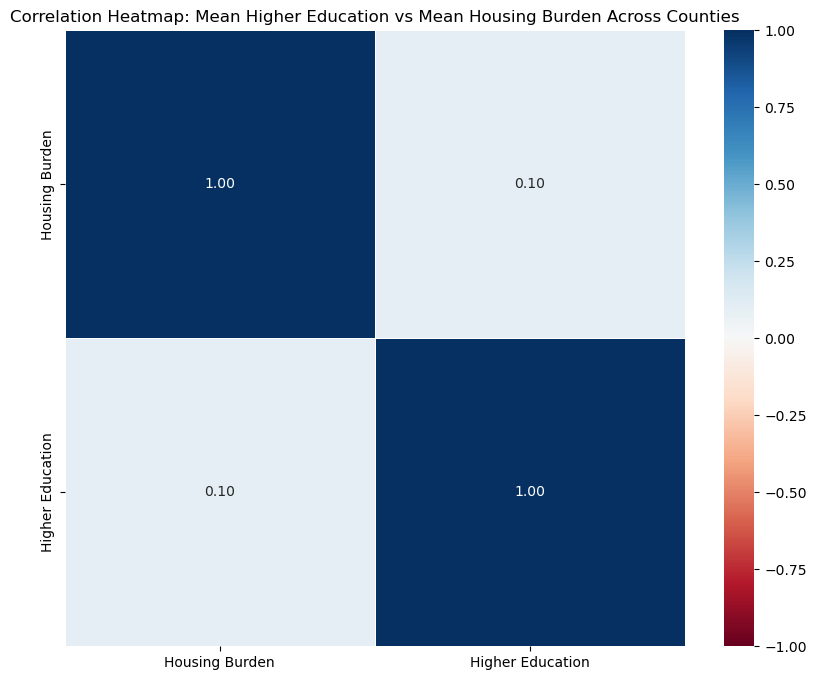

In [29]:
plt.figure(figsize=(10, 8))

# Create a heatmap
corr = means_combined[['Housing Burden', 'Higher Education']].corr()
sns.heatmap(corr, annot=True, cmap="RdBu", fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

# Set the title and show the plot
plt.title('Correlation Heatmap: Mean Higher Education vs Mean Housing Burden Across Counties')

### Barplot

<Axes: xlabel='housing_percent', ylabel='county_fips'>

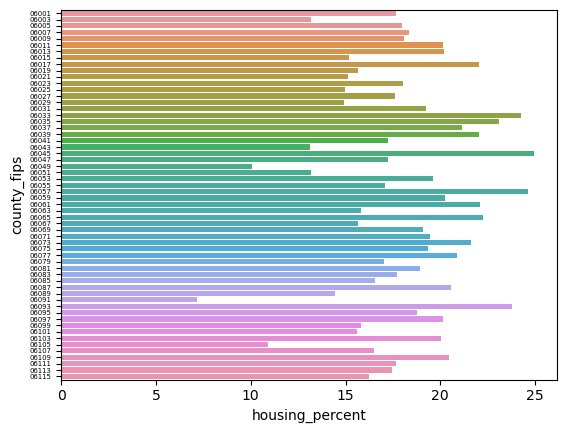

In [43]:
estimation = pd.concat([mean_house, mean_edu], axis=1).rename(columns={"percent": "housing_percent", "estimate": "education_estimate"})
estimation = estimation.reset_index()
estimation["county_fips"] = estimation["county_fips"].astype(str)
plt.yticks(fontsize = 5)
sns.barplot(x="housing_percent", y = "county_fips", data = estimation)

<Axes: xlabel='education_estimate', ylabel='county_fips'>

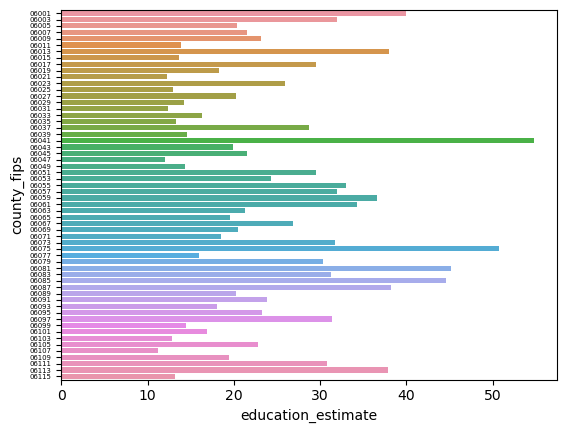

In [45]:
plt.yticks(fontsize = 5)
sns.barplot(x="education_estimate", y = "county_fips", data = estimation)

### Scatterplot

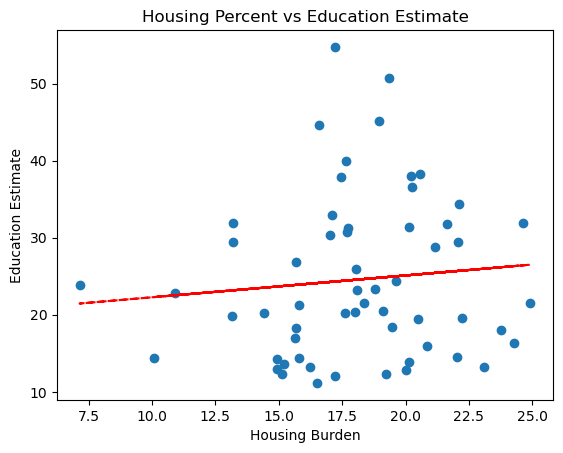

In [33]:
plt.scatter(means_combined["Housing Burden"], means_combined["Higher Education"])
plt.xlabel("Housing Burden")
plt.ylabel("Education Estimate")
plt.title("Housing Percent vs Education Estimate")
z = np.polyfit(means_combined["Housing Burden"], means_combined["Higher Education"], 1)
p = np.poly1d(z)
plt.plot(means_combined["Housing Burden"],p(means_combined["Housing Burden"]),"r--")

### OLS Regression to Help Interpret Scatterplot

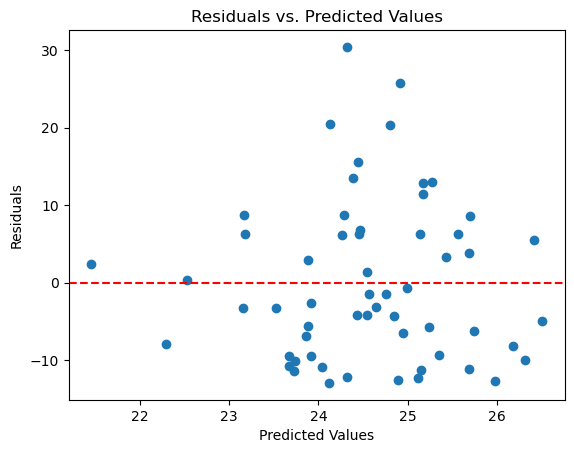

In [38]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
estimation = pd.concat([mean_house, mean_edu], axis=1).rename(columns={"percent": "housing_percent", "estimate": "education_estimate"})
# Homoscedasticity
model = smf.ols('education_estimate ~ housing_percent', data=estimation).fit()
X = sm.add_constant(estimation[['education_estimate', 'housing_percent']])
residuals = model.resid
predicted = model.predict(X)

plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()
# Assumption is met

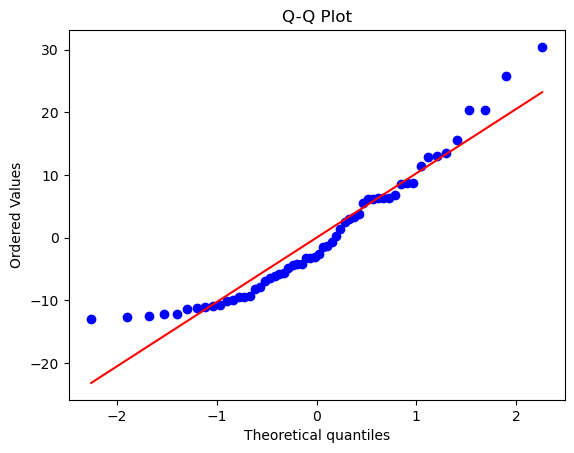

In [39]:
# Normality
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Assumption is met

In [40]:
model = smf.ols('education_estimate ~ housing_percent', data=estimation).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     education_estimate   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5255
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.472
Time:                        19:38:05   Log-Likelihood:                -217.64
No. Observations:                  58   AIC:                             439.3
Df Residuals:                      56   BIC:                             443.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.4354      7.200     

## Hypothesis Test

In [48]:
table = np.array([means_combined['Housing Burden']/100, means_combined['Higher Education']/100])
print(table)

stat, pval, degrees, freq_array = stats.chi2_contingency(table)
#stat, pval, degrees, freq_array
stats.chi2_contingency(table)

[[0.17670593 0.13181527 0.18003067 0.18358014 0.18084347 0.20144205
  0.20219793 0.15191752 0.22063858 0.15677464 0.15135558 0.18029943
  0.1494934  0.17621806 0.14934394 0.19243579 0.24270381 0.23084757
  0.21146565 0.22045864 0.17229297 0.13148773 0.249289   0.17229037
  0.10074888 0.13199011 0.19609063 0.1710333  0.24625456 0.20245985
  0.22092867 0.15795355 0.22235254 0.15674982 0.19096125 0.19458095
  0.21620399 0.1933763  0.20857033 0.17020392 0.18946596 0.1773307
  0.16573874 0.20569473 0.14436083 0.07141636 0.23766762 0.18779874
  0.20123854 0.15809767 0.15625613 0.20037906 0.10918471 0.16503715
  0.20479261 0.1768636  0.17453229 0.16243822]
 [0.39984715 0.31956229 0.20342844 0.21551367 0.23150556 0.13870473
  0.37979884 0.13659013 0.29480521 0.18256227 0.12279595 0.25940552
  0.12907985 0.2023853  0.14243714 0.12350642 0.1627661  0.13247732
  0.28751062 0.14558391 0.54761008 0.19898346 0.21586071 0.12078822
  0.14335212 0.29491578 0.24355912 0.32951591 0.31954183 0.36573754
  

Chi2ContingencyResult(statistic=1.1331774690581555, pvalue=1.0, dof=57, expected_freq=array([[0.24445332, 0.19138002, 0.16258322, 0.16921219, 0.17483228,
        0.14421917, 0.2467614 , 0.12232465, 0.21854353, 0.1438758 ,
        0.11623778, 0.18643094, 0.11811255, 0.16052442, 0.12371255,
        0.13395665, 0.17191559, 0.15404648, 0.21156145, 0.15519875,
        0.30523242, 0.14011681, 0.19721929, 0.12426269, 0.10349663,
        0.18100426, 0.18640754, 0.21222837, 0.23989258, 0.24091058,
        0.23917356, 0.15736439, 0.17705431, 0.18014592, 0.16786391,
        0.16083285, 0.22642625, 0.2971224 , 0.15622503, 0.20095607,
        0.27194837, 0.20755133, 0.25924551, 0.24939403, 0.14684104,
        0.13154522, 0.17716723, 0.17847428, 0.21852633, 0.12822041,
        0.13801521, 0.13947469, 0.14314061, 0.11727638, 0.16935897,
        0.20538253, 0.23461917, 0.12468058],
       [0.33209977, 0.25999753, 0.2208759 , 0.22988163, 0.23751675,
        0.1959276 , 0.33523538, 0.166183  , 0.2969002